## Converting fluid inclusion densities to depths
- Note, you will have to have CoolProp installed for this to work, if you have python installed through anaconda, conda install -c conda-forge coolprop in the command line normally works well

In [1]:
import CoolProp.CoolProp as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf

In [2]:
FIs=pd.read_excel('Fluid_Inclusion_Data.xlsx', sheet_name='Sheet1')

In [8]:
0.21*1000

210.0

## First, just calculate densities

In [3]:
Densities=pf.convert_density_depth_Coolprop(T_K=FIs['T_K'], 
                                   Crust_dens_gcm3=2.7,
                CO2_dens_gcm3=FIs['Density_g_cm3'], output='df')
Densities.head()

,Pressure (kbar),Pressure (MPa),Depth (km),input_Crust_dens_gcm3,input_T_K,input_CO2_dens_gcm3
0,0.543676,54.367617,2.052615,2.7,1200,0.21
1,0.250673,25.067256,0.946398,2.7,1250,0.10
2,0.117496,11.749641,0.443600,2.7,1210,0.05
3,1.607466,160.746622,6.068887,2.7,1300,0.45
4,2.822458,282.245803,10.656013,2.7,1410,0.60


## Monte Carlo Simulations for each FI

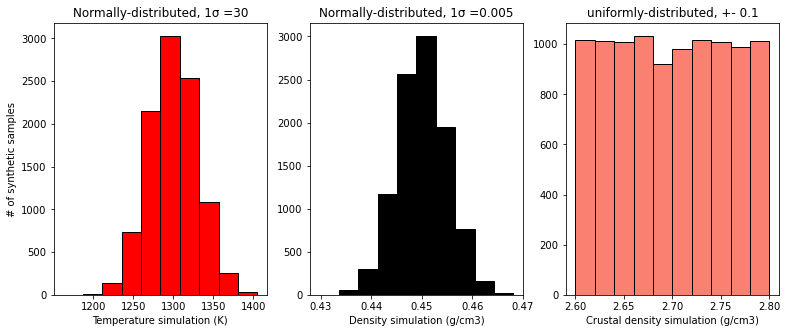

In [5]:
df_synthetic=pf.calculate_temperature_density_MC(df=FIs, sample_i=3,
crust_dens_gcm3=2.7, N_dup=10000,
error_T_K=30, error_type_T_K='Abs', error_dist_T_K='normal',
error_CO2_dens=0.005, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_crust_dens=0.1, error_type_crust_dens='Abs', error_dist_crust_dens='uniform' )


df_synthetic.head()

plt.savefig('Distributions.png', dpi=300)

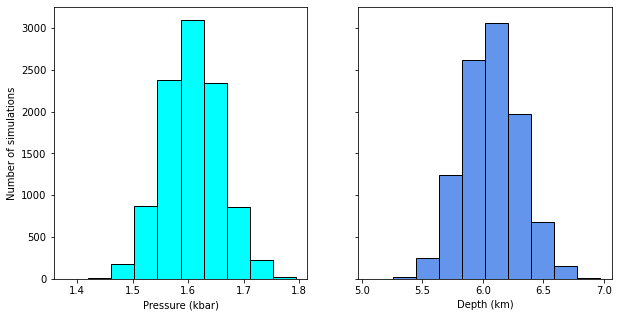

In [6]:
MC_T=pf.convert_density_depth_Coolprop(T_K=df_synthetic['T_K_with_noise'], 
                                    CO2_dens_gcm3=df_synthetic['CO2_dens_with_noise'], 
                                   Crust_dens_gcm3=df_synthetic['crust_dens_with_noise'],
                                     output='df')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
ax1.hist(MC_T['Pressure (kbar)'], color='cyan', ec='k')
ax2.hist(MC_T['Depth (km)'], color='cornflowerblue', ec='k')
ax1.set_xlabel('Pressure (kbar)')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('Number of simulations')
plt.savefig('Distribution_Press.png', dpi=300)

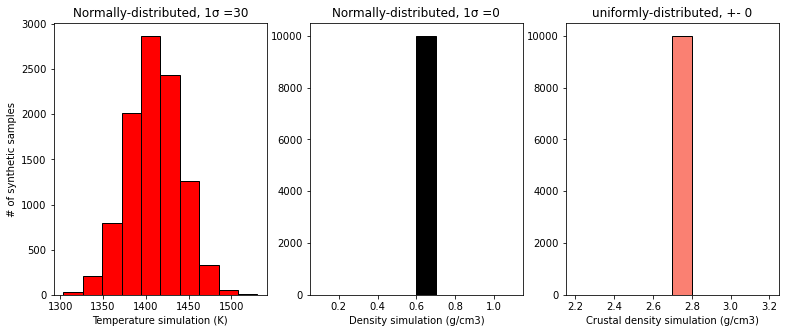

In [17]:
df_synthetic=pf.calculate_temperature_density_MC(df=FIs, sample_i=4,
crust_dens_gcm3=2.7, N_dup=10000,
error_T_K=30, error_type_T_K='Abs', error_dist_T_K='normal',
error_CO2_dens=0, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_crust_dens=0, error_type_crust_dens='Abs', error_dist_crust_dens='uniform' )


df_synthetic.head()

plt.savefig('Distributions.png', dpi=300)

In [18]:
MC_T=pf.convert_density_depth_Coolprop(T_K=df_synthetic['T_K_with_noise'], 
                                    CO2_dens_gcm3=df_synthetic['CO2_dens_with_noise'], 
                                   Crust_dens_gcm3=df_synthetic['crust_dens_with_noise'],
                                     output='df')

Text(0, 0.5, 'Temperature (K)')

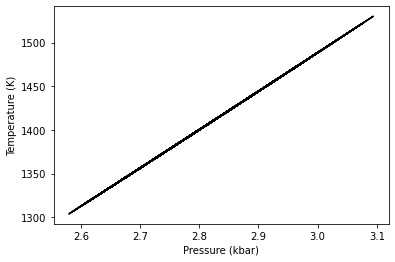

In [19]:
plt.plot(MC_T['Pressure (kbar)'], MC_T['input_T_K'], '-k')
plt.xlabel('Pressure (kbar)')
plt.ylabel('Temperature (K)')

In [12]:
MC_T

,Pressure (kbar),Pressure (MPa),Depth (km),input_Crust_dens_gcm3,input_T_K,input_CO2_dens_gcm3
0,1.547467,154.746694,5.842364,2.7,1258.490130,0.45
1,1.604336,160.433590,6.057069,2.7,1297.830666,0.45
2,1.552626,155.262587,5.861841,2.7,1262.053405,0.45
3,1.570392,157.039205,5.928916,2.7,1274.333033,0.45
4,1.573312,157.331188,5.939940,2.7,1276.352418,0.45
...,...,...,...,...,...,...
9995,1.620782,162.078239,6.119162,2.7,1309.232663,0.45
9996,1.699957,169.995682,6.418080,2.7,1364.273252,0.45
9997,1.631579,163.157866,6.159922,2.7,1316.723420,0.45
9998,1.608099,160.809946,6.071278,2.7,1300.438890,0.45
